# **Email Spam Detection with Machine Learning**

## **Introduction**

Spam emails, commonly referred to as junk mail, are unsolicited messages that often flood users' inboxes. These emails can range from harmless advertisements to dangerous phishing attempts or malicious content. With the increasing volume of email communication, automatically filtering out spam is crucial to safeguard users from potential threats and enhance their email experience.

In this project, we will leverage machine learning techniques to develop an efficient system that can distinguish between legitimate (ham) and spam emails. By training the model on labeled data from the **SMS Spam Collection Dataset**, we aim to automate the detection process and ensure more secure email communication.

## **Problem Statement**

The goal of this project is to design and implement an **Email Spam Detection** system using machine learning. The system will classify incoming email messages into two categories:
- **Ham** (Non-spam): Legitimate emails that users want to receive.
- **Spam**: Unwanted emails that are potentially harmful or annoying.


In [118]:
# Import Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

## **Data Overview**

The dataset used in this project is the **SMS Spam Collection Dataset**, which contains a set of labeled SMS messages that are categorized as either "ham" (legitimate) or "spam" (junk). 
The dataset contains 5,572 rows, each representing a single SMS message, and 2 columns:

- **v1 (Label)**: This column contains the labels, where "ham" represents non-spam (legitimate) messages, and "spam" represents spam messages.
- **v2 (Message)**: This column contains the actual text of the SMS message.


In [123]:
# Load dataset 

In [125]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [128]:
# Convert labels to binary values

In [130]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [132]:
# Clean the Messages

In [134]:
nltk.download('stopwords')

def clean_text(message):
    message = ''.join([char for char in message if char not in string.punctuation])
    message = message.lower()
    message = ' '.join([word for word in message.split() if word not in stopwords.words('english')])
    return message
    
df['message_cleaned'] = df['message'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,message,message_cleaned
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


## Tokenization and Feature Extraction
- **Tokenization**: It is the process of splitting text into individual words or smaller units, called tokens.
- **Feature extraction**: It involves converting these tokens into numerical values or vectors that a machine learning model can understand and use for prediction.

In [137]:
# Initialize CountVectorizer to convert text to a bag of words
# Fit and transform the cleaned messages into a numerical matrix

In [139]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message_cleaned'])
X.shape

(5572, 9376)

## Split the data 
Training is teaching the model with data, while testing checks how well the model performs with new, unseen data.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4457, 9376)
Testing data shape: (1115, 9376)


## Train a Naive Bayes Model
The Naive Bayes model is a simple machine learning algorithm that predicts the category of data (like spam or non-spam) based on the probability of certain features (like words in a message) occurring in each category, assuming the features are independent.

In [145]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

## Evaluate the Model
- **Accuracy**: Accuracy measures how often the model's predictions match the actual outcomes, expressed as the percentage of correct predictions out   of the total predictions.
- **Precision**: It is the ratio of correctly predicted positive observations to the total predicted positives.
- **Recall**: It is the ratio of correctly predicted positive observations to the total actual positives.
- **F1-Score**: It is the harmonic mean of precision and recall, providing a balance between the two.

In [148]:
# Precision = TP/TP+FP  TP -> True Positives, FP -> False Positives

In [150]:
# Recall = TP/TP+FN  TP -> True Positives, FN -> False Negatives

In [152]:
# F1-Score = 2 x Precision x Recall / Precision + Recall

Accuracy: 97.58%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.91      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



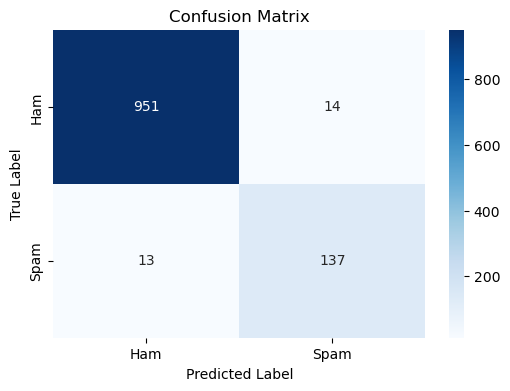

In [154]:
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Test with New Emails

In [157]:
# 1)Clean the input message
# 2)Convert the cleaned message into a numerical format
# 3)Predict whether the message is spam or not
# 4)Return the result
# 5)Test the function with a new email message

In [162]:
def predict_spam(message):
    cleaned_message = clean_text(message)
    vectorized_message = vectorizer.transform([cleaned_message])
    prediction = classifier.predict(vectorized_message)
    return "Spam" if prediction == 1 else "Ham"
print(predict_spam("Congratulations! You've won a free iPhone. Click here to claim now!"))
print(predict_spam("Hi there, can we meet tomorrow for lunch?"))

Spam
Ham


## **Conclusion**

We developed an email spam detection system using machine learning. By preprocessing the SMS Spam Collection Dataset and training a Naive Bayes classifier, we created a model that accurately distinguishes between spam and non-spam emails. The model’s performance, measured by accuracy and confusion matrix, confirms its effectiveness in automating spam detection and improving email management.